In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [6]:
df = spark.read.format("csv").option("header", "true").load("amazon.csv")
 
df.createOrReplaceTempView("amazon")
 
df.show()


+----------+--------------------+--------------------+----------------+------------+-------------------+------+------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|product_id|        product_name|            category|discounted_price|actual_price|discount_percentage|rating|rating_count|        about_product|             user_id|           user_name|           review_id|        review_title|      review_content|            img_link|        product_link|
+----------+--------------------+--------------------+----------------+------------+-------------------+------+------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|B07JW9H4J1|Wayona Nylon Brai...|Computers&Accesso...|            ₹399|      ₹1,099|                64%|   4.2|      2

In [9]:
# 1) The top 10 products with the highest number of reviews and their corresponding average ratings.

from pyspark.sql.functions import avg, count

top_products_by_reviews = (
    df.groupBy("product_id", "product_name")
    .agg(count("review_id").alias("review_count"), avg("rating").alias("avg_rating"))
    .orderBy("review_count", ascending=False)
    .limit(10)
)

top_products_by_reviews.show()

+----------+--------------------+------------+----------+
|product_id|        product_name|review_count|avg_rating|
+----------+--------------------+------------+----------+
|B09YLXYP7Y|Ambrane 60W / 3A ...|           3|       4.0|
|B09C6HXFC1|Duracell USB Ligh...|           3|       4.5|
|B085DTN6R2|Portronics Konnec...|           3|       4.2|
|B082T6V3DT|AmazonBasics New ...|           3|       4.3|
|B08Y1TFSP6|pTron Solero TB30...|           3|       3.9|
|B08WRWPM22|boAt Micro USB 55...|           3|       4.1|
|B08HDJ86NZ|boAt Deuce USB 30...|           3|       4.2|
|B096MSW6CT|Sounce Fast Phone...|           3|       3.9|
|B08CF3D7QR|Portronics Konnec...|           3|       4.3|
|B08R69VDHT|Pinnaclz Original...|           3|       4.0|
+----------+--------------------+------------+----------+



In [10]:
# 2) Find the total number of reviews for each category of products and order the result in descending order.

from pyspark.sql.functions import sum

total_reviews_by_category = (
    df.groupBy("category")
    .agg(sum("rating_count").alias("total_reviews"))
    .orderBy("total_reviews", ascending=False)
)

total_reviews_by_category.show()


+--------------------+-------------+
|            category|total_reviews|
+--------------------+-------------+
|Computers&Accesso...|      24503.0|
|Electronics|HomeT...|      12675.0|
|Home&Kitchen|Heat...|       5208.0|
|Home&Kitchen|Kitc...|       3802.0|
|Home&Kitchen|Kitc...|       3471.0|
|Electronics|HomeT...|       3213.0|
|Home&Kitchen|Kitc...|       2969.0|
|Electronics|Weara...|       2478.0|
|Home&Kitchen|Kitc...|       2144.0|
|Home&Kitchen|Heat...|       2066.0|
|Home&Kitchen|Heat...|       1725.0|
|Electronics|Gener...|       1633.0|
|Electronics|HomeT...|       1567.0|
|Home&Kitchen|Kitc...|       1489.0|
|Home&Kitchen|Kitc...|       1382.0|
|Computers&Accesso...|       1361.0|
|Home&Kitchen|Kitc...|       1332.0|
|Electronics|Mobil...|       1310.0|
|Computers&Accesso...|       1292.0|
|Electronics|Mobil...|       1253.0|
+--------------------+-------------+
only showing top 20 rows



In [11]:
# 3) Find the top 5 users who have written the longest reviews on average.

from pyspark.sql.functions import length

top_reviewers_by_length = (
    df.groupBy("user_id", "user_name")
    .agg(avg(length("review_content")).alias("avg_review_length"))
    .orderBy("avg_review_length", ascending=False)
    .limit(5)
)

top_reviewers_by_length.show()


+--------------------+--------------------+-----------------+
|             user_id|           user_name|avg_review_length|
+--------------------+--------------------+-----------------+
|AF7IXQKBUL6NEIQG4...|Neeraj Vishwakarm...|          18547.0|
|AHB43CZ4RHLJ5S6CB...|Sameer Patil,Tech...|          13253.0|
|AHJJY3GFDJFTDTX55...|Atulya Sinha,Suja...|          10220.0|
|AH3XZBFRJ3T2YATYJ...|Mukesh Maurya,Gya...|           9443.0|
|AEH4535UEBGBK4WIF...|Arnav,Bharjil Dek...|           8871.0|
+--------------------+--------------------+-----------------+



In [12]:
# 4) Find the products with the highest actual price and their corresponding average ratings.

top_priced_products = (
    df.orderBy("actual_price", ascending=False)
    .groupBy("product_id", "product_name")
    .agg(avg("rating").alias("avg_rating"))
    .limit(10)
)

top_priced_products.show()


+----------+--------------------+----------+
|product_id|        product_name|avg_rating|
+----------+--------------------+----------+
|B00P93X2H6|Classmate Pulse S...|       4.1|
|B078JF6X9B|Havells Instanio ...|       4.2|
|B09HN7LD5L|PROLEGEND® PL-T00...|       4.0|
|B09F6D21BY|7SEVEN Compatible...|       3.0|
|B078V8R9BS|Butterfly EKN 1.5...|       4.2|
|B09P22HXH6|Lenovo 300 FHD We...|       4.1|
|B00TDD0YM4|Philips GC026/30 ...|       4.4|
|B00E3DVQFS|Duracell Recharge...|       4.4|
|B0B5CGTBKV|boAt Wave Call Sm...|       3.8|
|B07TXCY3YK|Butterfly Hero Mi...|       3.9|
+----------+--------------------+----------+



In [13]:
# 5) Find the categories with the highest average ratings and their corresponding number of reviews.

top_rated_categories = (
    df.groupBy("category")
    .agg(avg("rating").alias("avg_rating"), sum("rating_count").alias("total_reviews"))
    .orderBy("avg_rating", ascending=False)
    .limit(5)
)

top_rated_categories.show()



+--------------------+----------+-------------+
|            category|avg_rating|total_reviews|
+--------------------+----------+-------------+
|Computers&Accesso...|       4.6|         null|
|Home&Kitchen|Craf...|       4.5|         null|
|Computers&Accesso...|       4.5|         null|
|Electronics|Power...|       4.5|         null|
|Electronics|HomeA...|       4.5|        224.0|
+--------------------+----------+-------------+



In [15]:
# 6) Find the top 10 most expensive products with their discounted prices and actual prices.

most_expensive_products = (
    df.orderBy("actual_price", ascending=False)
    .select("product_id", "product_name", "category", "discounted_price", "actual_price")
    .limit(10)
)

most_expensive_products.show()

+----------+--------------------+--------------------+----------------+------------+
|product_id|        product_name|            category|discounted_price|actual_price|
+----------+--------------------+--------------------+----------------+------------+
|B08SKZ2RMG|Demokrazy New Nov...|Home&Kitchen|Kitc...|            ₹475|        ₹999|
|B08CGW4GYR|Milk Frother, Imm...|Home&Kitchen|Kitc...|            ₹375|        ₹999|
|B08YK7BBD2|Nirdambhay Mini B...|Home&Kitchen|Kitc...|            ₹429|        ₹999|
|B0B8ZM9RVV|Zuvexa Egg Boiler...|Home&Kitchen|Kitc...|            ₹419|        ₹999|
|B08K36NZSV|KONVIO NEER 10 In...|Home&Kitchen|Kitc...|            ₹499|        ₹999|
|B09ZVJXN5L|KNYUC MART Mini E...|Home&Kitchen|Heat...|            ₹778|        ₹999|
|B0BL3R4RGS|VAPJA® Portable M...|Home&Kitchen|Kitc...|            ₹649|        ₹999|
|B08RDWBYCQ|T TOPLINE 180 W E...|Home&Kitchen|Kitc...|            ₹549|        ₹999|
|B09NNZ1GF7|Lint Remover For ...|Home&Kitchen|Kitc...|           

In [17]:
# 7) Find the average length of reviews for each category of products and order the result in descending order.

avg_review_length_by_category = (
    df.groupBy("category")
    .agg(avg(length("review_content")).alias("avg_review_length"))
    .orderBy("avg_review_length", ascending=False)
)

avg_review_length_by_category.show()


+--------------------+------------------+
|            category| avg_review_length|
+--------------------+------------------+
|Home&Kitchen|Kitc...|            7766.0|
|Computers&Accesso...|            5471.0|
|Home&Kitchen|Heat...|            3837.0|
|Computers&Accesso...|            3586.0|
|Electronics|Headp...|            3490.0|
|Electronics|HomeT...|            3365.0|
|Computers&Accesso...|            3130.0|
|Home&Kitchen|Kitc...|            3110.0|
|Home&Kitchen|Heat...|           2981.75|
|MusicalInstrument...|            2977.0|
|Computers&Accesso...|            2955.0|
|Home&Kitchen|Kitc...|2866.1666666666665|
|Home&Kitchen|Kitc...|           2729.25|
|Electronics|Mobil...|           2659.25|
|Home&Kitchen|Kitc...|            2580.0|
|Computers&Accesso...|            2521.0|
|Electronics|HomeA...|            2328.0|
|Electronics|Mobil...|2283.0833333333335|
|Computers&Accesso...|2234.3333333333335|
|Home&Kitchen|Kitc...|            2203.0|
+--------------------+------------

In [19]:
# 8) Find the top 5 products with the highest percentage of discount and their corresponding actual and discounted prices.

top_discounted_products = (
    df.filter("discount_percentage IS NOT NULL")
    .orderBy("discount_percentage", ascending=False)
    .select("product_id", "product_name", "category", "discounted_price", "actual_price", "discount_percentage")
    .limit(5)
)

top_discounted_products.show()


+----------+--------------------+--------------------+--------------------+--------------------+-------------------+
|product_id|        product_name|            category|    discounted_price|        actual_price|discount_percentage|
+----------+--------------------+--------------------+--------------------+--------------------+-------------------+
|B0BLV1GNLN|"WZATCO Pixel | P...|                  PC|                PS4"|Electronics|HomeT...|             ₹6,490|
|B0B2RBP83P|"Lenovo IdeaPad 3...|         81X800LGIN"|Computers&Accesso...|             ₹37,247|            ₹59,890|
|B09939XJX8|"TVARA LCD Writin...| Erasable Reusabl...| Educational and ...|Computers&Accesso...|               ₹354|
|B08JMC1988|"boAt Stone 180 5...| IPX7 & TWS Featu...|Electronics|HomeA...|                ₹999|             ₹2,490|
|B09YV463SW|"Fire-Boltt Ninja...|       Sp02 Tracking| Over 100 Cloud b...|Electronics|Weara...|             ₹1,499|
+----------+--------------------+--------------------+----------

In [25]:
# 9) Find the top 10 users who have written reviews for the highest number of products and their corresponding number of reviews.

from pyspark.sql.functions import countDistinct

top_reviewers_by_products = (
    df.groupBy("user_id", "user_name")
    .agg(countDistinct("product_id").alias("distinct_products"), count("review_id").alias("total_reviews"))
    .orderBy("distinct_products", ascending=False)
)

top_reviewers_by_products.show()

+--------------------+--------------------+-----------------+-------------+
|             user_id|           user_name|distinct_products|total_reviews|
+--------------------+--------------------+-----------------+-------------+
|AGAELRYPMTG5SADZP...|Satheesh Kadiam,P...|                8|            8|
|AHIKJUDTVJ4T6DV6I...|$@|\|TO$|-|,Sethu...|                8|           10|
|AG3D6O4STAQKAY2UV...|Manav,Adarsh gupt...|                6|            8|
|AHWRZWPCTG6ICA7WT...|siddharth patnaik...|                6|            6|
|AFSMISGEYDYIP3Z42...|Ayush,ROHIT A.,Ke...|                5|            5|
|AHEVOQADJSSRX7DS3...|Manoj maddheshiya...|                5|            5|
|                 4.2|              13,937|                5|            5|
|AG44HJB2AMIVHAGQZ...|Prashant,Sumesh S...|                5|            6|
|AEJLOEHISUISLO2Z4...|Meghnad,Partha De...|                4|            4|
|AEWAZDZZJLQUYVOVG...|Omkar dhale,JD,HE...|                4|            7|
|AF477BP57JM

In [26]:
# 10) This query analyzes the products with the highest discount percentage based on the dataset provided.

from pyspark.sql.functions import desc

top_discounted_products = (
    df.select("product_id", "product_name", "category", "discount_percentage")
    .orderBy(desc("discount_percentage"))
    .limit(10)
)

top_discounted_products.show()

+----------+--------------------+--------------------+--------------------+
|product_id|        product_name|            category| discount_percentage|
+----------+--------------------+--------------------+--------------------+
|B0BLV1GNLN|"WZATCO Pixel | P...|                  PC|              ₹6,490|
|B0B2RBP83P|"Lenovo IdeaPad 3...|         81X800LGIN"|             ₹59,890|
|B09939XJX8|"TVARA LCD Writin...| Erasable Reusabl...|                ₹354|
|B08JMC1988|"boAt Stone 180 5...| IPX7 & TWS Featu...|              ₹2,490|
|B07Z53L5QL|"ProElite Faux Le...|              Black"|              ₹1,499|
|B09YV463SW|"Fire-Boltt Ninja...|       Sp02 Tracking|              ₹1,499|
|B09YV42QHZ|"Fire-Boltt Ninja...|       Sp02 Tracking|              ₹1,499|
|B00N1U7JXM|"3M Post-it Stick...|           reminders|OfficeProducts|Of...|
|B0BNV7JM5Y|"boAt Newly Launc...| Smart Calling wi...|Menu Personalization|
|B0B3RS9DNF|Fire-Boltt Phoeni...|   120+ Sports Modes|Electronics|Weara...|
+----------+

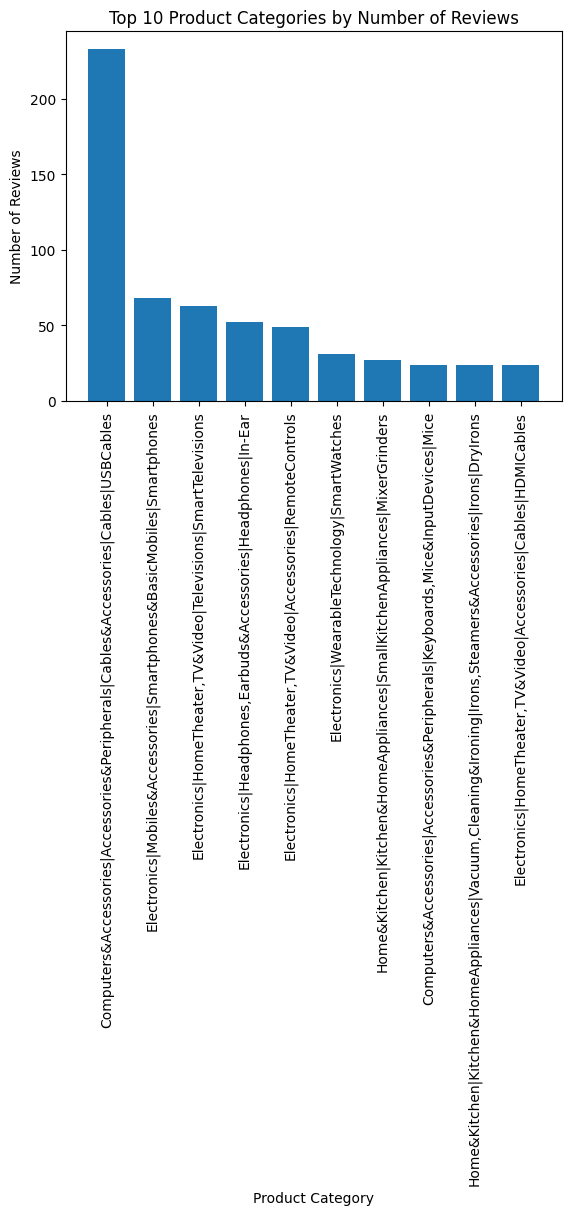

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

from pyspark.sql.functions import count
category_review_count = (
    df.groupBy("category")
    .agg(count("review_id").alias("review_count"))
    .orderBy("review_count", ascending=False)
    .limit(10)
)

# Convert Spark DataFrame to Pandas DataFrame
category_review_count_pd = category_review_count.toPandas()

# Create bar chart using matplotlib
plt.bar(category_review_count_pd["category"], category_review_count_pd["review_count"])
plt.xticks(rotation=90)
plt.xlabel("Product Category")
plt.ylabel("Number of Reviews")
plt.title("Top 10 Product Categories by Number of Reviews")
plt.show()
